In [2]:
import zipfile
zip_ref = zipfile.ZipFile(r'C:\archive_3.zip', 'r')
zip_ref.extractall('/Archive3')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
# generators -- used for processing large amount of data in batches by dividing the data (image_dataset_from_directory is the generator function name)
# Ref: https://keras.io/api/data_loading/image/

train_ds = keras.preprocessing.image_dataset_from_directory(
    directory=r'C:\Archive3\train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256)
)

Found 5216 files belonging to 2 classes.


In [5]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    directory=r'C:\Archive3\test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256)
)

Found 626 files belonging to 2 classes.


In [6]:
# Normalize (bringing the pixel values between 0 and 1)
train_ds = train_ds.map(lambda x, y: (x / 255., y))
test_ds = test_ds.map(lambda x, y: (x / 255., y))

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())

In [8]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # binary_crossentropy - binary classification

history = model.fit(train_ds, epochs=23, validation_data=test_ds)

Epoch 1/23
163/163 [==============================] - 193s 1s/step - loss: 0.1539 - accuracy: 0.9394 - val_loss: 0.6843 - val_accuracy: 0.7300
Epoch 2/23
163/163 [==============================] - 186s 1s/step - loss: 0.0825 - accuracy: 0.9688 - val_loss: 0.7258 - val_accuracy: 0.7827
Epoch 3/23
163/163 [==============================] - 178s 1s/step - loss: 0.0703 - accuracy: 0.9726 - val_loss: 1.1838 - val_accuracy: 0.7173
Epoch 4/23
163/163 [==============================] - 180s 1s/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 1.8446 - val_accuracy: 0.7077
Epoch 5/23
163/163 [==============================] - 185s 1s/step - loss: 0.0501 - accuracy: 0.9804 - val_loss: 1.8140 - val_accuracy: 0.7332
Epoch 6/23
163/163 [==============================] - 193s 1s/step - loss: 0.0374 - accuracy: 0.9858 - val_loss: 2.1651 - val_accuracy: 0.7061
Epoch 7/23
163/163 [==============================] - 185s 1s/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 1.4429 - val_accuracy: 0.7524

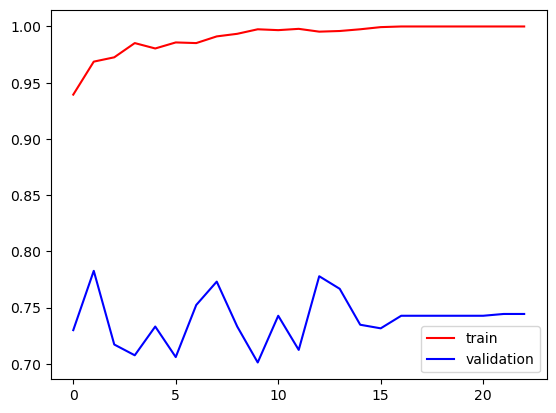

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

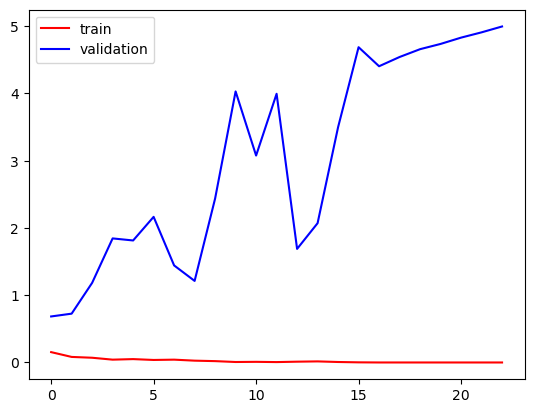

In [13]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 31ms/step
Predicted class label: NORMAL = 0


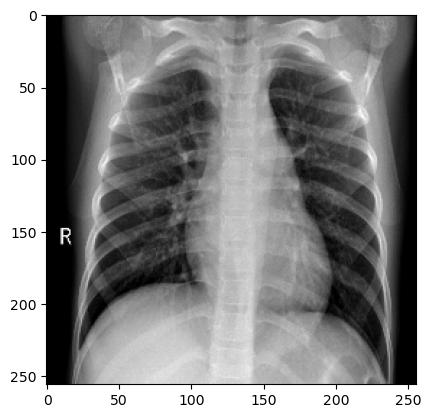

In [16]:
import cv2
import numpy as np

plt.imshow(test_img)

test_img = cv2.imread(r'C:\Archive3\test\NORMAL\IM-0086-0001.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = np.expand_dims(test_img / 255., axis=0)

class_names = ["NORMAL", "PNEUMONIA"]  # Replace "class1" and "class2" with the actual class names

prediction = int(np.round(model.predict(test_input)[0]))
class_label = class_names[prediction]

print("Predicted class label:", class_label,"=", prediction)

1/1 [==============================] - 0s 31ms/step
Predicted class label: PNEUMONIA = 1


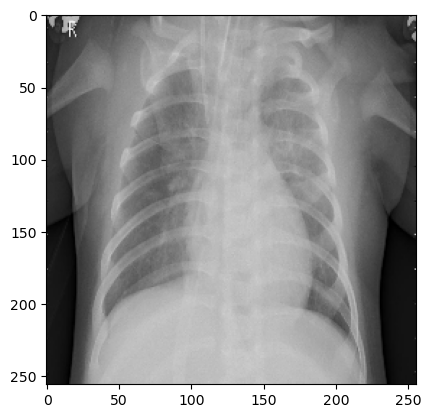

In [17]:
test_img = cv2.imread(r'C:\Archive3\test\PNEUMONIA\person114_bacteria_544.jpeg')
test_img = cv2.resize(test_img, (256, 256))
test_input = np.expand_dims(test_img / 255., axis=0)

plt.imshow(test_img)

class_names = ["NORMAL", "PNEUMONIA"]  # Replace "class1" and "class2" with the actual class names

prediction = int(np.round(model.predict(test_input)[0]))
class_label = class_names[prediction]

print("Predicted class label:", class_label,"=", prediction)